<a href="https://colab.research.google.com/github/Numanur/data-science-ml/blob/main/Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
#creating x(feature matrix)
x = df.drop("target", axis=1)
#creating y (labels)
y = df["target"]


In [7]:
#choosing a model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
#split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [8]:
#training the model
clf.fit(x_train, y_train);

In [9]:
#predicting
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1])

In [10]:
y_test

,target
213,0
249,0
59,1
140,1
2,1
...,...
184,0
151,1
42,1
53,1


In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.846


In [12]:
clf.score(x_train, y_train)

1.0

In [13]:
clf.score(x_test, y_test)

0.8461538461538461

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        39
           1       0.85      0.88      0.87        52

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [15]:
confusion_matrix(y_test, y_pred)

array([[31,  8],
       [ 6, 46]])

In [16]:
accuracy_score(y_test, y_pred)

0.8461538461538461

# **Fine Tuning the model**

In [17]:
#we need to tune the n_estimators
np.random.seed(0)
for i in range(10,100,10):
  print(f"Trying model with {i} estimators...")
  clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
  print(f"Model accuracy on test set: {clf.score(x_test, y_test)*100:.3f}%")
  print("")

Trying model with 10 estimators...
Model accuracy on test set: 82.418%

Trying model with 20 estimators...
Model accuracy on test set: 81.319%

Trying model with 30 estimators...
Model accuracy on test set: 82.418%

Trying model with 40 estimators...
Model accuracy on test set: 82.418%

Trying model with 50 estimators...
Model accuracy on test set: 81.319%

Trying model with 60 estimators...
Model accuracy on test set: 84.615%

Trying model with 70 estimators...
Model accuracy on test set: 84.615%

Trying model with 80 estimators...
Model accuracy on test set: 83.516%

Trying model with 90 estimators...
Model accuracy on test set: 85.714%



In [18]:
import pickle
pickle.dump(clf, open("random_forest_v1.pkl", "wb"))

In [19]:
loaded_model = pickle.load(open("random_forest_v1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8571428571428571

# **Finding best Settings**

In [20]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']   # <-- No 'auto' anymore
}


rf_random = RandomizedSearchCV(
    estimator = clf,
    param_distributions = param_grid,
    n_iter = 50,  # How many different combinations to try
    cv = 5,       # 5-fold cross-validation
    verbose = 2,  # How much information to print
    random_state = 42,
    n_jobs = -1   # Use all processors
)

In [21]:
rf_random.fit(x_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=90),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [22]:
print(rf_random.best_params_)


{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None}


In [23]:
best_clf = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='log2',
    max_depth=5,
    random_state=42
)

In [47]:
best_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=4,
                       n_estimators=500, random_state=42)

In [40]:
y_pred = best_clf.predict(x_test)

In [48]:
best_clf.score(x_train, y_train)

0.8962264150943396

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4725274725274725

Confusion Matrix:
 [[14 24]
 [24 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.37      0.37        38
           1       0.55      0.55      0.55        53

    accuracy                           0.47        91
   macro avg       0.46      0.46      0.46        91
weighted avg       0.47      0.47      0.47        91



#**Use of predict_proba() function**

In [28]:
best_clf.predict_proba(x_test)

array([[0.8307735 , 0.1692265 ],
       [0.63804349, 0.36195651],
       [0.5137869 , 0.4862131 ],
       [0.10095144, 0.89904856],
       [0.06611589, 0.93388411],
       [0.29358   , 0.70642   ],
       [0.16313878, 0.83686122],
       [0.16393696, 0.83606304],
       [0.77932972, 0.22067028],
       [0.20413342, 0.79586658],
       [0.39835832, 0.60164168],
       [0.10613667, 0.89386333],
       [0.66950916, 0.33049084],
       [0.35819761, 0.64180239],
       [0.76991939, 0.23008061],
       [0.71445819, 0.28554181],
       [0.61946908, 0.38053092],
       [0.0918153 , 0.9081847 ],
       [0.38751293, 0.61248707],
       [0.52026865, 0.47973135],
       [0.61491629, 0.38508371],
       [0.80471426, 0.19528574],
       [0.09328303, 0.90671697],
       [0.42613625, 0.57386375],
       [0.14830208, 0.85169792],
       [0.36226977, 0.63773023],
       [0.25933077, 0.74066923],
       [0.49238332, 0.50761668],
       [0.67678956, 0.32321044],
       [0.12788476, 0.87211524],
       [0.

In [29]:
best_clf.predict_proba(x_test[:5])

array([[0.8307735 , 0.1692265 ],
       [0.63804349, 0.36195651],
       [0.5137869 , 0.4862131 ],
       [0.10095144, 0.89904856],
       [0.06611589, 0.93388411]])

This represents the probability of each class either heart disease or not heart disease

#**Evaluation of a model**
- `score` method
- `scoring` Parameter
- problem specific metrics functions

In [30]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/heart-disease.csv")
X = df.drop("target", axis=1)
y = df["target"]

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(15)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#Using the score method

In [32]:
model.score(X_train, y_train)

1.0

In [50]:
model.score(X_test, y_test)

0.7912087912087912

#Using `cross-validation` scoring method

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y)

array([0.80327869, 0.86885246, 0.80327869, 0.81666667, 0.76666667])

In [53]:
single_score = model.score(X_test, y_test)
cross_mean_score = np.mean(cross_val_score(model, X, y))
single_score, cross_mean_score

(0.7912087912087912, np.float64(0.8281967213114754))

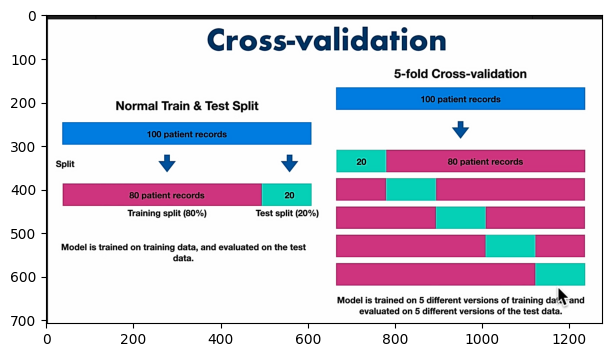

In [51]:
img = plt.imread("/content/drive/MyDrive/Colab Datasets/images/cv.png")
plt.figure(figsize=(15,4))
plt.imshow(img)

#cross validation takes the whole X and Y as input and divide the dataset to 5(cv=5) different splits and fit them.

#**Evaluation Report Data**
* cross_val_score accuracy
* AUC/ROC curve
* Confusion matrix
* Classification report

**Cross Val Accuracy**

In [10]:
np.random.seed(15)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()

X = df.drop("target", axis=1)
y = df["target"]

cross_val=cross_val_score(model, X, y)

print(f"Cross Val Accuracy: {np.mean(cross_val)*100:.2f}%")


Cross Val Accuracy: 82.15%


**Area under the reciever operating characteristic curve(ROC/AUC)**

ROC is the ratio curve of model's true positive vs false positive.
- True Positive: Model predicts 1, when truth is 1.
- False Positive: Model predicts 1, when truth is 0.
- True Negative: Model predicts 0 when truth ia 0.
- False Negative: Model predicts 0 when truth is 1.

In [14]:
from sklearn.metrics import roc_curve
np.random.seed(15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model.fit(X_train, y_train)

y_preds = model.predict_proba(X_test)
y_preds[:5]

array([[0.98, 0.02],
       [0.62, 0.38],
       [0.16, 0.84],
       [0.05, 0.95],
       [0.39, 0.61]])